# Homework 3 
Due Date - Friday 6th March (11:59 PM)

# Imports 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)  # reproducible randomness

# Synthetic Data

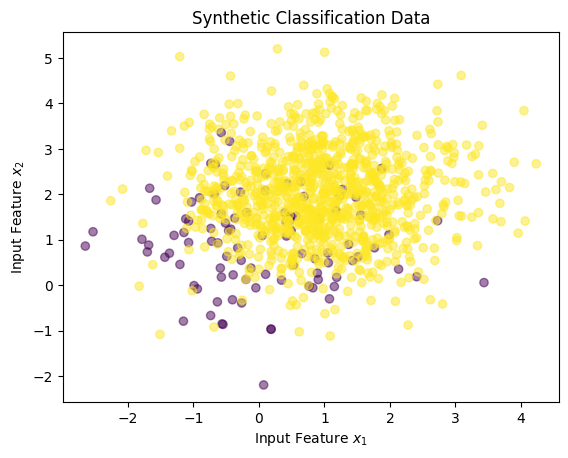

In [72]:
# Synthetic Classification Data

n = 100
class_1_x_1 = rng.normal(loc=0.0, scale=1.0, size = n)
class_1_x_2 = rng.normal(loc=1.0, scale=1.0, size = n)

class_2_x_1 = rng.normal(loc=1.0, scale=1.0, size = 10 * n)
class_2_x_2 = rng.normal(loc=2.0, scale=1.0, size = 10 * n)


x_1 = np.concatenate([class_1_x_1, class_2_x_1])
x_2 = np.concatenate([class_1_x_2, class_2_x_2])
y = np.concatenate([np.zeros(n), np.ones(10 * n)])

X = np.vstack([x_1, x_2]).T

plt.figure()
plt.scatter(x_1, x_2, c = y, alpha=0.5)
plt.xlabel('Input Feature $x_1$')
plt.ylabel('Input Feature $x_2$')
plt.title('Synthetic Classification Data')
plt.show()

# Question 1 - Logistic Regression via Gradient Descent (15 Points)

In logistic regression we model the probability that a sample belongs to class 1 using the **sigmoid** function:

$\hat{y} = \sigma(\mathbf{\theta_0} + \theta_1 \cdot x_1 + \theta_2 \cdot x_2) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2)}}$

where $\mathbf{\theta} = [\theta_0, \theta_1, \theta_2]$ are the weights.

We minimize the **Binary Cross-Entropy (BCE) Loss**:

$L = -\frac{1}{m}\sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$

The gradients of the BCE loss with respect to the parameters are:

$\frac{\partial L}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i) \cdot x_{ij}$ (Note: This equation works for both $\theta_1$ and $\theta_2$ but not for $\theta_0$ which is the bias term)

$\frac{\partial L}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i)$

Implement the `sigmoid` function, the `bce_loss` function, and complete `run_logistic_regression_gd` below.

In [73]:
###############################################
############ Question 1(a) - 3 pts ###########
###############################################

# TODO: Implement the sigmoid function

################################################
########## Write your answer here ##############    
################################################

def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1.0 / (1.0 + np.exp(-z))

################################################
########## End of your answer ##################
################################################

# Quick sanity check
print(f"sigmoid(0)  = {sigmoid(0):.4f}  (expected 0.5)")
print(f"sigmoid(10) = {sigmoid(10):.4f}  (expected ~1.0)")
print(f"sigmoid(-10)= {sigmoid(-10):.4f}  (expected ~0.0)")

sigmoid(0)  = 0.5000  (expected 0.5)
sigmoid(10) = 1.0000  (expected ~1.0)
sigmoid(-10)= 0.0000  (expected ~0.0)


In [74]:
###############################################
############ Question 1(b) - 2 pts ###########
###############################################

# TODO: Implement the Binary Cross-Entropy loss function
# Hint: use a small epsilon (e.g. 1e-12) inside the log to avoid log(0)

################################################
########## Write your answer here ##############    
################################################

def bce_loss(y_true, y_pred):
    """Compute Binary Cross-Entropy loss."""
    
    # Some additional steps to ensure numerical stability
    # This is important because log(0) is undefined and can cause issues when y_pred is exactly 0 or 1.
    eps = 1e-12
    y_pred = np.clip(y_pred, eps, 1 - eps)

    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

################################################
########## End of your answer ##################
################################################

# Sanity check
print(f"BCE when predicting 0.9 for y=1: {bce_loss(np.array([1]), np.array([0.9])):.4f}")
print(f"BCE when predicting 0.1 for y=1: {bce_loss(np.array([1]), np.array([0.1])):.4f}  (should be higher)")

BCE when predicting 0.9 for y=1: 0.1054
BCE when predicting 0.1 for y=1: 2.3026  (should be higher)


In [75]:
###############################################
############ Question 1(c) - 10 pts ##########
###############################################

# TODO: Complete the gradient descent loop for logistic regression.
# Fill in: the predicted probabilities (y_hat), the gradients for w and b,
# and the parameter update steps.

################################################
########## Write your answer here ##############    
################################################

def run_logistic_regression_gd(X, y, learning_rate=0.1, epochs=1000):
    """
    Train a logistic regression model using gradient descent.
    
    Parameters
    ----------
    X : np.ndarray, shape (m, 2)  – feature matrix
    y : np.ndarray, shape (m,)    – binary labels (0 or 1)
    learning_rate : float
    epochs : int
    
    Returns
    -------
    theta : np.ndarray, shape (2,)  – learned weights
    bias : float                   – learned bias
    loss_history : list[float]  – BCE loss recorded every 50 iterations
    """
    num_examples, num_features = X.shape

    # Here, to make things a little more explicit, I'm using 'theta' for weights and 'bias' for bias,
    # and computing gradients for both separately. 
    
    theta = np.zeros(num_features) # This is going to be of shape (2, 1). We have not included the bias term here because we are treating it separately.
    bias = 0.0
    loss_history = []

    for epoch in range(epochs):
        # Forward pass: compute predicted probabilities
        # Given the current parameters (theta and bias), compute the linear combination z and then apply sigmoid to get y_hat.
        # Make sure you add the bias term to the product of input and theta before applying sigmoid.
        z = X @ theta + bias
        
        y_hat = sigmoid(z)

        # Compute gradients
        error = y_hat - y
        grad_theta = (1 / num_examples) * (X.T @ error)
        grad_bias = (1 / num_examples) * np.sum(error)

        # Update parameters
        theta -= learning_rate * grad_theta
        bias -= learning_rate * grad_bias

        ################################################
        ########## End of your answer ##################
        ################################################

        # Track loss periodically
        if epoch % 50 == 0 or epoch == epochs - 1:
            loss_history.append(bce_loss(y, y_hat))

    return theta, bias, loss_history

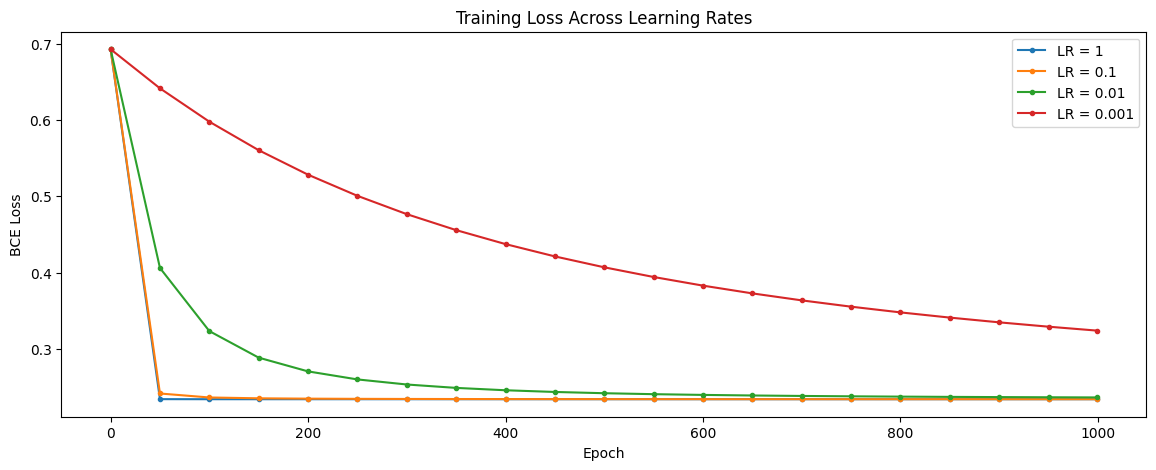

In [76]:
# Train the model and plot the loss curve for several learning rates
fig, ax1 = plt.subplots(1, 1, figsize=(14, 5))

for lr in [1, 0.1, 0.01, 0.001]:
    theta, bias, loss_history = run_logistic_regression_gd(X, y, learning_rate = lr, epochs = 1000)
    iters = list(range(0, 1000, 50)) + [999]
    ax1.plot(iters, loss_history, marker="o", markersize=3, label=f"LR = {lr}")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("BCE Loss")
ax1.set_title("Training Loss Across Learning Rates")
ax1.legend()
plt.show()


In [77]:
# Use the best learning rate to compute accuracy 
best_lr = 0.1
theta, bias, loss_history = run_logistic_regression_gd(X, y, learning_rate=best_lr, epochs=1000)
print(f"Learned Weights: \ntheta_1 = {theta[0]:.4f}\ntheta_2 = {theta[1]:.4f}\ntheta_0 (bias) = {bias:.4f}\n")

# Compute training accuracy using a threshold of 0.5
y_hat = sigmoid(X @ theta + bias)

# Compute predicted classes based on the threshold
y_pred_class = (y_hat >= 0.5).astype(int)
accuracy = np.mean(y_pred_class == y)
print(f"Training Accuracy (Threshold = 0.5): {accuracy:.4f}")

Learned Weights: 
theta_1 = 0.8505
theta_2 = 1.0396
theta_0 (bias) = 0.3425

Training Accuracy (Threshold = 0.5): 0.9209


## Question 2 (6 points – 2 each)

2(a): Why do we use **Binary Cross-Entropy** instead of **Mean Squared Error** as the loss function for logistic regression? What would happen if we used MSE with the sigmoid function?

2(b): What happens to the training loss as you increase or decrease the learning rate? Which learning rate seems to work best and why?

2(c): The sigmoid function outputs values between 0 and 1. What is the **interpretation** of these output values in the context of classification?

Enter your answer here

2(a) - MSE with the sigmoid function creates a non-convex loss surface with many local minima, making optimization unreliable. BCE is convex for logistic regression and provides gradients that are proportional to the prediction error, leading to faster and more stable learning. More importantly, when MSE for logistic regression has small gradients since the worst error can be 1 or -1 but for log loss, the worst error can be infinity. 

2(b) - When the learning rate is too high (e.g. 10), the loss may oscillate or diverge. When it is too small (e.g. 0.001), the loss decreases very slowly. A moderate learning rate like 0.1 works best because it converges quickly without instability.

2(c) - The sigmoid output $\hat{y}$ represents the estimated probability that the sample belongs to class 1, i.e. $P(y=1 \mid \mathbf{x})$. A value of 0.8 means the model believes there is an 80% chance the sample is in class 1.

# Question 3 – Plotting the Decision Boundary (10 Points)

The decision boundary of a logistic regression model is the set of points where $\hat{y} = 0.5$, which corresponds to:

$\theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \theta_0 = 0$

For our two-feature case this becomes:

$\theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \theta_0 = 0 \quad\Longrightarrow\quad x_2 = -\frac{\theta_1 x_1 + \theta_0}{\theta_2}$

Use the learned weights from Question 1 and plot:
1. The original data points colored by class
2. The decision boundary line overlaid on the scatter plot

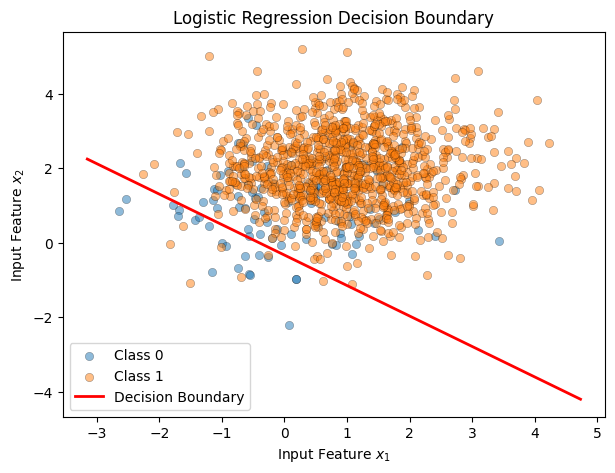

In [78]:
###############################################
############### Question 3 ####################
################ 10 points ####################
###############################################

# TODO: Using the learned weights w and bias b from Question 1, 
# plot the decision boundary on top of the scatter plot of the data.
# Hint: Solve for x_2 in terms of x_1 using the equation above.

################################################
########## Write your answer here ##############    
################################################

plt.figure(figsize=(7, 5))

# Scatter the data points colored by class
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.5, label="Class 0", edgecolors="k", linewidths=0.3)
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.5, label="Class 1", edgecolors="k", linewidths=0.3)

# Decision boundary: x_2 = -(theta_1 * x_1 + theta_0) / theta_2
# Use the equation for the decision boundary derived from the logistic regression model
# to compute the corresponding x_2 values for a range of x_1 values.
x1_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200)

x2_boundary = -(theta[0] * x1_range + bias) / theta[1]

plt.plot(x1_range, x2_boundary, color="red", linewidth=2, label="Decision Boundary")

################################################
########## End of your answer ##################
################################################

plt.xlabel("Input Feature $x_1$")
plt.ylabel("Input Feature $x_2$")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

## Question 4 (4 points – 2 each)

4(a): The decision boundary is a straight line. Why is this the case for logistic regression? Could logistic regression ever produce a curved decision boundary on its own?

4(b): Looking at the plot, are there data points on the "wrong" side of the boundary? What does that tell you about the separability of the two classes?

Enter your answer here

4(a) - Logistic regression is a linear classifier because the decision boundary is defined by $\mathbf{\theta_1} \cdot x_1 + \theta_0 = 0$, which is a linear equation in the input features. On its own (without feature engineering like adding polynomial features), logistic regression cannot produce a curved decision boundary.

4(b) - Yes, there are data points on the wrong side. This is expected because the two classes are not perfectly linearly separable. The model finds the best linear separator but cannot correctly classify every point.

# Question 5 – Precision-Recall Curve (25 Points)

Instead of using a fixed threshold of 0.5, we can vary the classification threshold $t \in [0, 1]$ and compute **Precision** and **Recall** at each value.

For a given threshold $t$, a sample is predicted as **positive** (class 1) if $\hat{y} \geq t$.

Then:

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

where:
- **TP** (True Positives) = number of samples where $y = 1$ **and** $\hat{y} \geq t$
- **FP** (False Positives) = number of samples where $y = 0$ **and** $\hat{y} \geq t$
- **FN** (False Negatives) = number of samples where $y = 1$ **and** $\hat{y} < t$

Compute precision and recall for thresholds from 0 to 1 (in steps of 0.01) and plot the Precision-Recall curve.

Also compute True Positive Rate and False Positive Rate to compute the Receiver Operator Characteristics Curve (ROC)

In [127]:
###############################################
############ Question 5(a) - 20 pts ##########
###############################################

# TODO: Using the predicted probabilities y_hat from your trained model,
# loop over thresholds from 0 to 1 (step 0.01) and compute
# precision, recall, tpr and fpr at each threshold. Store them in lists.
# Handle the edge case where TP + FP = 0 (precision is undefined).

################################################
########## Write your answer here ##############    
################################################

# Get predicted probabilities from the trained model
# Use your code from above 
y_hat = sigmoid(X @ theta + bias)

# Loop over all possible values of threhsholds between 0 and 1 (inclusive) with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Some lists to save computer values 
precisions = []
recalls = []
tprs = []
fprs = []

# Loop over thresholds 
for t in thresholds:

    # Compute predicted classes based on the current threshold
    y_pred_t = (y_hat >= t).astype(int)
    
    # Compute TP, FP, FN, TN based on the predicted classes and true labels
    TP = np.sum((y_pred_t == 1) & (y == 1))
    FP = np.sum((y_pred_t == 1) & (y == 0))
    FN = np.sum((y_pred_t == 0) & (y == 1))
    TN = np.sum((y_pred_t == 0) & (y == 0))

    # When you calculate precision, check to make sure the denominator
    # is greater than 0. If it is not, set precision to 1.0 (since we have no false positives,
    #  we can consider it perfect precision).
    precision = TP / (TP + FP) if (TP + FP) > 0 else 1.0

    # Similarly, when calculating recall, if the denominator is 0 (which means we have no true
    #  positives and no false negatives), we can set recall to 0.0 since we have no true positives to recall.
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # Compute TPR and FPR for the current threshold
    # Keep in mind the same issue as above when computing precision and recall. If the denominator is 0, you can set TPR to 0.0 
    # (since we have no true positives to recall) and 
    # FPR to 0.0 (since we have no false positives).
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    FPR = FP / (TN + FP) if (TN + FP) > 0 else 0.0
    
    precisions.append(precision)
    recalls.append(recall)
    tprs.append(TPR)
    fprs.append(FPR)


precisions = np.array(precisions)
recalls = np.array(recalls)
tprs = np.array(tprs)
fprs = np.array(fprs)

################################################
########## End of your answer ##################
################################################

# Print a few sample values
print(f"{'Threshold':>10} {'Precision':>10} {'Recall':>10}")
print("-" * 32)
for idx in range(0, len(thresholds), 10):
    print(f"{thresholds[idx]:>10.2f} {precisions[idx]:>10.4f} {recalls[idx]:>10.4f}")

print ()

# Print a few sample values
print(f"{'Threshold':>10} {'TPR':>10} {'FPR':>10}")
print("-" * 32)
for idx in range(0, len(thresholds), 10):
    print(f"{thresholds[idx]:>10.2f} {tprs[idx]:>10.4f} {fprs[idx]:>10.4f}")

 Threshold  Precision     Recall
--------------------------------
      0.00     0.9091     1.0000
      0.10     0.9091     1.0000
      0.20     0.9107     0.9990
      0.30     0.9138     0.9970
      0.40     0.9187     0.9950
      0.50     0.9254     0.9930
      0.60     0.9310     0.9850
      0.70     0.9371     0.9680
      0.80     0.9505     0.9220
      0.90     0.9600     0.7690
      1.00     1.0000     0.0000

 Threshold        TPR        FPR
--------------------------------
      0.00     1.0000     1.0000
      0.10     1.0000     1.0000
      0.20     0.9990     0.9800
      0.30     0.9970     0.9400
      0.40     0.9950     0.8800
      0.50     0.9930     0.8000
      0.60     0.9850     0.7300
      0.70     0.9680     0.6500
      0.80     0.9220     0.4800
      0.90     0.7690     0.3200
      1.00     0.0000     0.0000


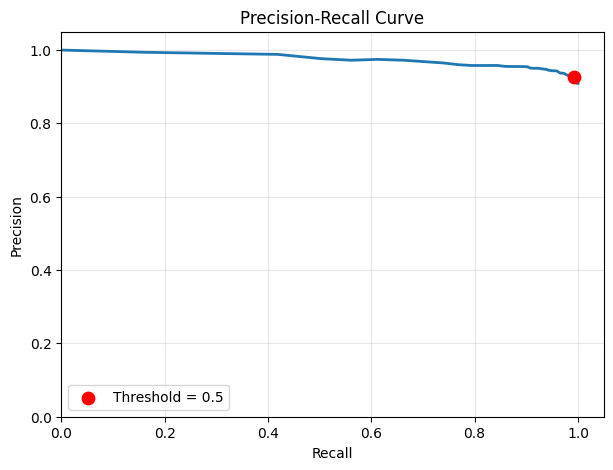

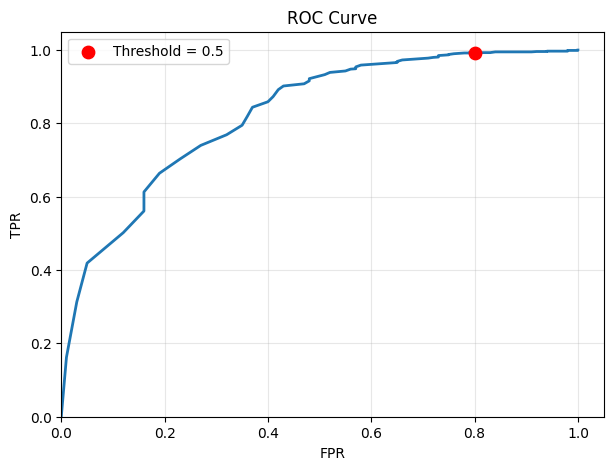

In [101]:
###############################################
############ Question 5(b) - 2.5 pts ###########
###############################################

# TODO: Plot the Precision-Recall curve using the values you computed above.
# X-axis should be Recall, Y-axis should be Precision.
# Also plot the ROC Curve with FPR on the X-axis and TPR on the Y-axis.


################################################
########## Write your answer here ##############    
################################################

plt.figure(figsize=(7, 5))

# Plot the Precision-Recall curve using the values you computed above.
plt.plot(recalls, precisions, color="tab:blue", linewidth=2)

# Mark the threshold = 0.5 point
idx_05 = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(recalls[idx_05], precisions[idx_05], color="red", zorder=5, s=80, label=f"Threshold = 0.5")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()


plt.figure(figsize=(7, 5))

# Plot the ROC Curve with FPR on the X-axis and TPR on the Y-axis.
plt.plot(fprs, tprs, color="tab:blue", linewidth=2)


# Mark the threshold = 0.5 point
idx_05 = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fprs[idx_05], tprs[idx_05], color="red", zorder=5, s=80, label=f"Threshold = 0.5")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()

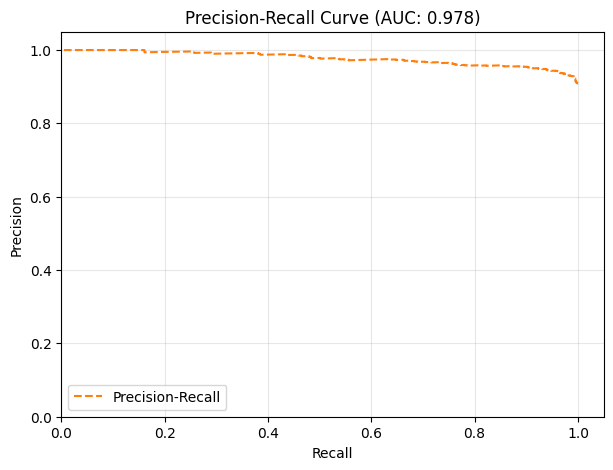

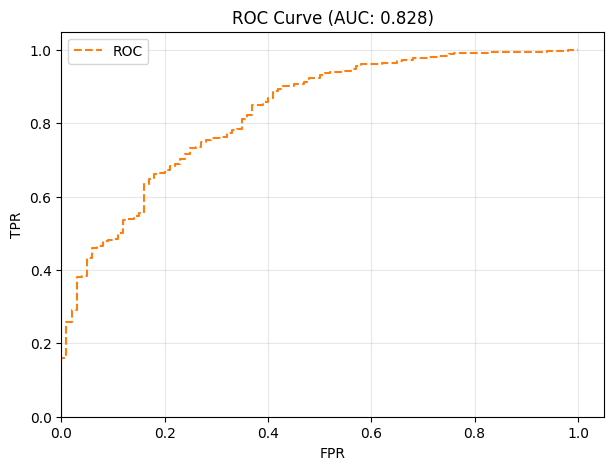

In [110]:
###############################################
############ Question 5(c) - 2.5 pts ##########
###############################################

# TODO: Plot the Precision-Recall and ROC curve 
# using the values computed from sklearn's built in functions for verification.

################################################
########## Write your answer here ##############    
################################################

from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, roc_curve

# Plot the same curves using sklearn's built in functions for verification
plt.figure(figsize=(7, 5))
precision_sk, recall_sk, _ = precision_recall_curve(y, y_hat)

# Enter the right values to plot below
plt.plot(recall_sk, precision_sk, color="tab:orange", linestyle="--", label="Precision-Recall")


plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC: {average_precision_score(y, y_hat):.3f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()

plt.figure(figsize=(7, 5))
fpr_sk, tpr_sk, _ = roc_curve(y, y_hat)

# Enter the right values to plot below
plt.plot(fpr_sk, tpr_sk, color="tab:orange", linestyle="--", label="ROC")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"ROC Curve (AUC: {roc_auc_score(y, y_hat):.3f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.show()

# Question 6 (6 points - 2 each)

Let us examine what the distribution of predicted probabilities looks like below. 

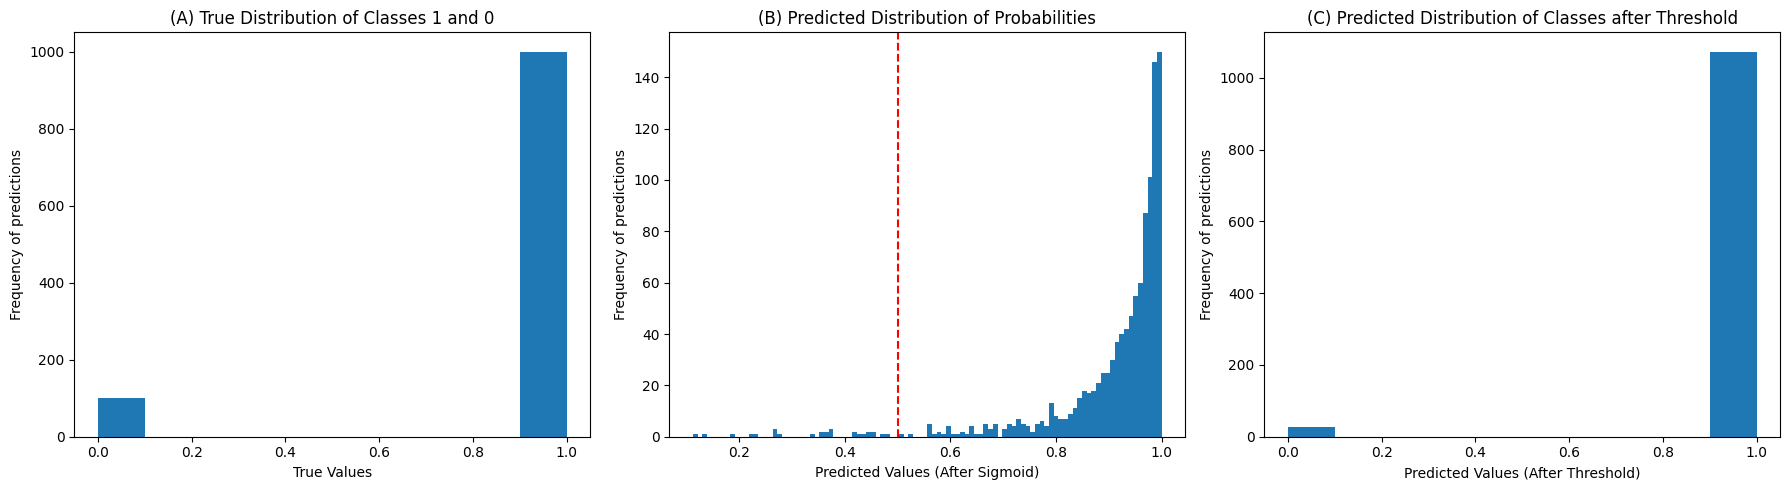

In [125]:
threshold = 0.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('(A) True Distribution of Classes 1 and 0')
ax1.hist(y)
ax1.set_xlabel('True Values')
ax1.set_ylabel('Frequency of predictions')

ax2.set_title('(B) Predicted Distribution of Probabilities')
ax2.hist(y_hat, bins=100)
ax2.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
ax2.set_xlabel('Predicted Values (After Sigmoid)')
ax2.set_ylabel('Frequency of predictions')


ax3.set_title('(C) Predicted Distribution of Classes after Threshold')
ax3.hist((y_hat > threshold).astype(int))
ax3.set_xlabel('Predicted Values (After Threshold)')
ax3.set_ylabel('Frequency of predictions')

plt.tight_layout()
plt.show()

6(a): Look at plot (A). What does it tell you about the dataset? Is it an evenly split dataset? What metrics make sense for such a dataset? 

6(b): Look at plot (C). Play around with the threshold values. What happens when the threshold is set to a small value like 0.1? What about a large value like 0.99? 

6(c): Ideally you want plot (C), i.e., the **distribution** of predicted classes to look similar to plot (A), i.e., the **distribution** of true classes. How would you pick a threhsold that does this? 



Enter your answer here:

6(a) - The data set is skewed/biases, there's more instances of class 1 than 0 by almost 10x. 

6(b) - When the threshhold is 0.1, everything gets classified as class 1. When threhsold is 0.99, most examples are classified as class 0. 

6(c) - We could use the ROC curve or the precision-recall curve to pick the ideal threshold value. 

## Question 7 (24 points – 2 each)

7(a): What happens to **Precision** as you increase the threshold from 0 to 1? What happens to **Recall**? Explain intuitively why they move in opposite directions.

7(b): Imagine you are building a medical screening test where **missing a positive case is very costly**. Would you choose a high threshold or a low threshold? Would you prioritize precision or recall?

7(c): Describe a real-world scenario where you would prefer **high precision over high recall**. Justify your answer.

7(d): Give an example of an algorithm that does not have a closed-form solution and explain why one does not exist.

7(e): Explain the difference between the validation dataset and the test dataset

7(f): In K-Nearest Neighbors, if we increase K, how does bias change? How does variance change?

7(g): Given a dataset, describe the steps needed to determine the optimal value of $\lambda$

7(h): Let X be a matrix with m rows and n columns. How would you find $\theta$ to satisfy the equation $X\theta = Y$? What could be a potential issue if you find that your solution is running into error or is very unstable?

7(i) If a matrix is of shape (n x m) where m < n, then what is the maximum possible rank of the matrix?

7(j): Given a fixed $\theta$ when does a logistic regression predict “class 1” and when does it predict “class 0”?

7(k): List one pro and one con of increasing the validation set from 20% of the original data to 30%?

7(l): If you have a small amount of data and do not want to waste data on a test/validation split, what would you do? 


Enter your answers below: 

7(a): Precision goes up as the threshold goes from 0 to 1. Recall goes down as the threshold goes from 0 to 1. 

7(b): Low threshold, prioritize high recall

7(c): Spam filtering or crime prediction. You dont want to predict something as positive and have it be wrong. False positives are costly. 

7(d): Logistic regression since we have a non-linear sigmoid function.

7(e): Test set should be truly unseen. A practitioner can fit hyperparameters to the validation set but not test. 

7(f): Bias goes up with k. 

7(g): Try various values and see where Train and Validation MSE are lowest. 

7(h): Compute $\theta = X^{-1}Y$. If it unstable, then $X$ is not full rank or has correlated rows/columns. 

7(i) m, since rank is min(m, n)

7(j): When $\theta_0 + \theta_1 x = 0$

7(k): Pro - you have more trustworthy estimates of your test set performance. Con - You lose training data. Your model could overfit. 

7(l): Use cross-validation. 
